# 1. Is there any way to combine five different models that have all been trained on the same training data and have all achieved 95 percent precision? If so, how can you go about doing it? If not, what is the reason?

ANS:Yes, it's possible to combine the predictions of five different models that have all been trained on the same training data and have achieved 95 percent precision. This process is often referred to as "model ensembling" or "model averaging." There are a few common techniques you can use to combine the predictions of these models:

1. **Voting (Majority Vote):** In this approach, each model makes predictions on a given instance, and the final prediction is determined by a majority vote. If most of the models predict a certain class, that class is selected as the final prediction.

2. **Weighted Voting:** Similar to majority vote, but you can assign different weights to each model based on their individual performance. Models with higher precision might be given higher weights to carry more influence in the final decision.

3. **Averaging:** For regression tasks, you can simply take the average of the predictions from all the models. For classification tasks, you can average the predicted class probabilities and select the class with the highest average probability.

4. **Stacking:** Stacking involves training another model, called a meta-model, to learn how to combine the predictions of the base models. The meta-model takes the predictions of the base models as its inputs and learns how to make a final prediction based on their outputs.

5. **Bagging and Boosting:** These are ensemble methods that create multiple instances of a base model and combine their predictions in various ways to improve performance. Random Forest (bagging) and Gradient Boosting (boosting) are popular implementations of these concepts.

The reason you can combine these models successfully is that each model might have learned slightly different patterns or have different strengths and weaknesses. By combining their predictions, you can leverage their diverse knowledge and potentially improve the overall performance and generalization of the ensemble.

However, keep in mind that while combining models can lead to improved performance, it's not always guaranteed. It depends on the diversity and quality of the individual models, as well as the specific problem you're trying to solve. It's a good practice to experiment with different combination techniques and assess their performance on validation data before deploying the ensemble in real-world scenarios.

* By using Voting :

Ensemble Accuracy: 1.0


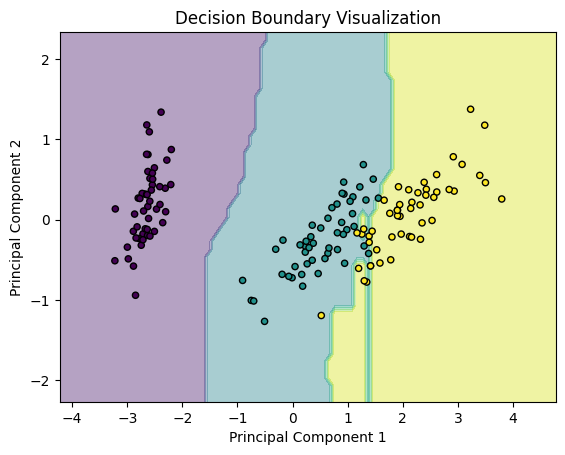

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply PCA for visualization (reduce to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create individual classifiers
tree_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

# Create a VotingClassifier with weighted voting
# You can adjust the weights based on your needs
voting_classifier = VotingClassifier(
    estimators=[('tree', tree_classifier), ('knn', knn_classifier)],
    voting='hard',  # Use 'soft' for weighted voting
)

# Train the ensemble
voting_classifier.fit(X_train, y_train)

# Make predictions using the ensemble
ensemble_predictions = voting_classifier.predict(X_test)

# Calculate accuracy of the ensemble
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", accuracy)

# Visualize the decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = voting_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary Visualization')
plt.show()


* Using Weighted Voting Approach:

Ensemble Accuracy: 1.0


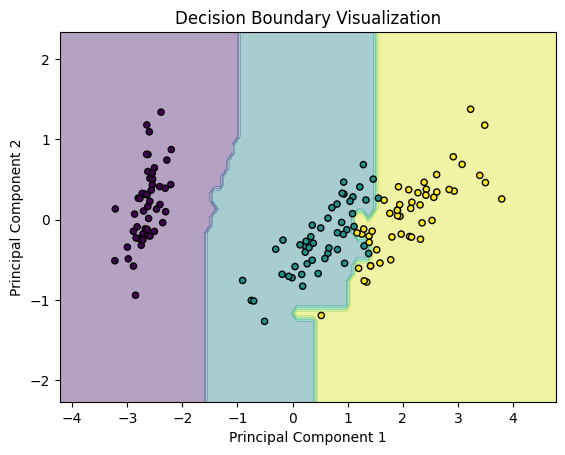

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply PCA for visualization (reduce to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create individual classifiers
tree_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
random_forest=RandomForestClassifier()

# Create a VotingClassifier with weighted voting
# You can adjust the weights based on your needs
voting_classifier = VotingClassifier(
    estimators=[('tree', tree_classifier), ('knn', knn_classifier),('random',random_forest)],
    voting='soft',  # Use 'soft' for weighted voting
    weights=[2,2,2]   # Adjust the weights as needed
)

# Train the ensemble
voting_classifier.fit(X_train, y_train)

# Make predictions using the ensemble
ensemble_predictions = voting_classifier.predict(X_test)

# Calculate accuracy of the ensemble
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", accuracy)

# Visualize the decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = voting_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary Visualization')
plt.show()


# 2. What&#39;s the difference between hard voting classifiers and soft voting classifiers?

ANS:Hard voting classifiers and soft voting classifiers are two approaches used in ensemble learning, specifically in techniques like the `VotingClassifier`. They differ in how they combine the predictions of individual base models (classifiers) to make the final prediction for a given instance.

1. **Hard Voting Classifier:**
In a hard voting classifier, each individual base model (classifier) in the ensemble makes a prediction, and the final prediction is determined by a simple majority vote. The class that receives the most votes becomes the ensemble's final prediction. In other words, the class that the majority of individual models agree on is selected.

For example, if you have three base models and they predict classes A, A, and B for a particular instance, the hard voting classifier would predict class A (since it's the majority vote).

Hard voting works well when the individual models in the ensemble are diverse, and their errors are uncorrelated. It essentially takes a "majority rules" approach.

2. **Soft Voting Classifier:**
In a soft voting classifier, each individual base model produces a probability distribution over the classes for a given instance. The final prediction is based on the class with the highest average probability across all models. This approach takes into account the confidence or probability that each model assigns to its prediction.

For example, if you have three base models that predict class A with probabilities 0.7, 0.8, and 0.6, respectively, and class B with probabilities 0.3, 0.2, and 0.4, the soft voting classifier would predict class A since the average probabilities for class A are higher.

Soft voting allows models with higher confidence to have a greater influence on the final decision, even if their predictions might not be in the majority. It can be more suitable when the individual models have varying degrees of accuracy and confidence.

In summary, the main difference between hard and soft voting classifiers lies in how they handle the predictions of individual models. Hard voting uses majority voting, while soft voting takes into account the probabilities assigned by each model. The choice between them depends on the characteristics of the base models and the nature of the problem you're trying to solve.

# 3. Is it possible to distribute a bagging ensemble&#39;s training through several servers to speed up the process? Pasting ensembles, boosting ensembles, Random Forests, and stacking ensembles are all options.

ANS:Yes, it is possible to distribute the training of ensemble methods like bagging ensembles (such as Random Forests), boosting ensembles, pasting ensembles, and even stacking ensembles across multiple servers to speed up the training process. Distributed computing can help utilize the computational power of multiple machines or nodes, enabling faster training and better scalability.

Here's how you might distribute the training of different ensemble methods:

1. **Bagging Ensembles (Random Forests, Pasting):**
   Bagging ensembles like Random Forests and pasting can be distributed across multiple servers by training different base models (trees or other classifiers) on different subsets of the data and then aggregating the results. Each server can train a subset of base models independently, and then their outputs can be combined to form the final ensemble prediction.

2. **Boosting Ensembles (AdaBoost, Gradient Boosting, XGBoost):**
   Boosting ensembles involve training models sequentially, where each subsequent model focuses on correcting the mistakes of the previous ones. Distributing boosting ensembles can be a bit more challenging due to the sequential nature of training. However, techniques like parallelized boosting algorithms and distributed gradient boosting libraries have been developed to leverage distributed computing resources.

3. **Stacking Ensembles:**
   Stacking involves training multiple base models and then training a meta-model on their predictions. The base models can be trained on different servers, and their predictions can be collected and combined on another server where the meta-model is trained.

For practical implementation, you might use tools and libraries that support distributed computing, such as Apache Spark, Dask, TensorFlow, or PyTorch. These frameworks provide tools to parallelize computation and distribute training across clusters of machines.

Keep in mind that while distributing the training of ensemble methods can speed up the process, it might also introduce challenges like communication overhead, synchronization, and load balancing. Additionally, the effectiveness of distribution depends on the size of your dataset, the complexity of the models, and the available resources in your cluster.

Before distributing the training process, it's a good idea to benchmark the training times on a single machine and then assess the benefits of distributing across multiple servers.

# 4. What is the advantage of evaluating out of the bag?

ANS:Evaluating "out of the bag" (OOB) is a concept associated with bagging ensembles, such as Random Forests. Bagging involves training multiple base models (often referred to as "base learners") on different subsets of the training data. The OOB evaluation is a way to estimate the performance of the ensemble without the need for a separate validation set or cross-validation. It provides several advantages:

1. **Efficiency:** OOB evaluation allows you to estimate the ensemble's performance using the same training data that was used to build the ensemble. This can be efficient because it avoids the need to set aside a separate validation set or perform cross-validation.

2. **Unbiased Estimation:** Since each base model is trained on a different subset of the data, some data points are left out during the training of each model. These omitted data points can be used for OOB evaluation. This provides an unbiased estimate of the ensemble's generalization performance because each base model is tested on instances it hasn't seen during training.

3. **No Data Leakage:** OOB evaluation ensures that the base models are evaluated on unseen data, which helps avoid data leakage. This is especially important when hyperparameter tuning or model selection is involved.

4. **Less Computational Cost:** Cross-validation can be computationally expensive, particularly when dealing with large datasets or complex models. OOB evaluation is often quicker to compute since it doesn't require repeatedly training and evaluating the models on different folds.

5. **Simpler Workflow:** Using OOB evaluation simplifies the workflow since you don't need to explicitly partition your data into training and validation sets. This can be advantageous in scenarios where you have limited data or when you want to make the most out of your training samples.

6. **Quick Assessment of Ensemble Size:** OOB error estimates can help you quickly assess the impact of changing the number of base models in your ensemble. You can monitor the OOB error as the ensemble size increases to determine if adding more models leads to better performance or if the ensemble has already reached a stable level of accuracy.

It's important to note that while OOB evaluation provides a useful estimate of performance, it might not be as accurate as a well-designed validation or cross-validation approach, especially when the dataset is small or the models are complex. In such cases, you should still consider using traditional validation techniques to get a more reliable estimate of your ensemble's performance.

# 5. What distinguishes Extra-Trees from ordinary Random Forests? What good would this extra randomness do? Is it true that Extra-Tree Random Forests are slower or faster than normal Random Forests?

ANS:

**Extra-Trees vs. Random Forests:**

Extra-Trees (Extremely Randomized Trees) and Random Forests are both ensemble methods that combine multiple decision trees to improve predictive accuracy and control overfitting. However, the key distinction lies in how they select split points for the nodes in the decision trees.

1. **Split Selection:**
   In a Random Forest, for each node and feature, a subset of features is considered, and the best feature and split point are chosen based on some impurity criterion (such as Gini impurity or entropy). This subset of features adds some level of randomness to the split selection process, but the split point within the chosen feature is still determined based on the data.

   In contrast, Extra-Trees take the randomness further. For each node and feature, not only is a random subset of features considered, but the split point is also chosen randomly without optimizing the impurity criterion. This extra randomness distinguishes Extra-Trees from Random Forests.

**Benefits of Extra Randomness:**

The additional randomness in Extra-Trees serves a few purposes:

- **Reduced Variance:** The extra randomness in split point selection can lead to decision trees with greater diversity. This diversity can help to reduce the variance of the model and make the ensemble less prone to overfitting, especially on noisy datasets.

- **Bias-Variance Trade-off:** By increasing randomness, Extra-Trees introduce some bias into individual trees. However, the ensemble can still achieve good performance by averaging out this bias across multiple trees.

- **Computational Efficiency:** Because the split points are selected randomly without extensive optimization, Extra-Trees tend to be faster to train compared to Random Forests.

**Speed Comparison:**

Indeed, Extra-Trees are generally faster to train than Random Forests. The reason is that the random split point selection removes the need for the optimization process, which involves evaluating multiple potential split points for each feature.

In summary, the extra randomness in Extra-Trees leads to more diversity among the base models, reducing overfitting potential. While it introduces some bias, the ensemble averaging helps mitigate this. Extra-Trees are typically faster to train due to the absence of split optimization. The choice between Extra-Trees and Random Forests depends on your dataset, available computational resources, and the balance between bias and variance you seek to achieve.

# 6. Which hyperparameters and how do you tweak if your AdaBoost ensemble underfits the training data?

ANS:If your AdaBoost ensemble is underfitting the training data, it means that the ensemble is not capturing the underlying patterns in the data effectively. To address this issue, you can adjust certain hyperparameters to make the ensemble more complex and better fit the training data. Here are the key hyperparameters you can tweak in AdaBoost:

1. **n_estimators:**
   The number of base estimators (usually decision trees) in the ensemble. Increasing the number of estimators can increase the complexity of the model and help it fit the data better. However, be cautious not to set this value too high, as it can lead to overfitting.

2. **base_estimator:**
   The type of base estimator used in the ensemble. If your current base estimator is too simple (e.g., a shallow decision tree), you might consider using a more complex base estimator.

3. **learning_rate:**
   The learning rate shrinks the contribution of each base estimator. Increasing the learning rate can lead to a more complex ensemble, as each base estimator's impact is amplified. However, this should be balanced with the number of estimators.

4. **base_estimator hyperparameters:**
   If your base estimator is a decision tree, you can adjust its hyperparameters, such as `max_depth`, `min_samples_split`, and `min_samples_leaf`, to allow for deeper and more complex trees.

5. **algorithm:**
   The algorithm used to update the sample weights after each iteration. The default is 'SAMME' (for binary classification), and 'SAMME.R' for multiclass. You might experiment with 'SAMME.R' as it can handle class probabilities and might help in preventing underfitting.

6. **sample_weight:**
   If you suspect that certain instances are more important for correct classification, you can assign different weights to them. This can help the algorithm pay more attention to difficult instances.

To address underfitting, you generally want to increase the complexity of the ensemble. However, it's important to find the right balance, as increasing complexity excessively can lead to overfitting. A good approach is to start by increasing the number of estimators and possibly adjusting the learning rate. Monitor the performance on a validation set to ensure you're achieving better fitting without overfitting.

Remember to perform cross-validation or use a validation set to evaluate the impact of each hyperparameter change and avoid over-optimization on your specific dataset.

In [9]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Create a regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostRegressor without hyperparameter tuning
adaboost_regressor = AdaBoostRegressor(random_state=42)
adaboost_regressor.fit(X_train, y_train)

# Make predictions
predictions = adaboost_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 3494.96112814498


In [11]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Create a regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostRegressor with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    # Add more hyperparameters to tune here
}

adaboost_regressor = AdaBoostRegressor(random_state=42)
grid_search = GridSearchCV(adaboost_regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions
predictions = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Best Model Mean Squared Error:", mse)
print("Best Model Hyperparameters:", best_model.get_params())


Best Model Mean Squared Error: 2982.4848820755933
Best Model Hyperparameters: {'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 200, 'random_state': 42}


# 7. Should you raise or decrease the learning rate if your Gradient Boosting ensemble overfits the training set?

ANS:If  Gradient Boosting ensemble is overfitting the training set, you should generally decrease the learning rate rather than raising it. A lower learning rate can help mitigate overfitting by slowing down the learning process and making the model more robust to individual noisy data points or outliers.

Here's why decreasing the learning rate can be beneficial to address overfitting:

1. **Smaller Steps:** A lower learning rate means that each update to the model's parameters is smaller. This prevents the model from fitting the training data too closely and helps avoid overfitting.

2. **Improved Generalization:** Smaller steps during optimization can lead to better generalization to unseen data. The model is less likely to memorize noise in the training data and instead learns more meaningful patterns.

3. **Regularization Effect:** In a way, decreasing the learning rate introduces a form of regularization. It acts as a form of "shrinkage" that prevents the model from overreacting to individual training instances.

However, it's important to note that simply adjusting the learning rate might not be sufficient to fully address overfitting. Other techniques, such as reducing the complexity of the base models (trees), increasing the number of training samples, or applying feature selection, might also be necessary to combat overfitting effectively.

In summary, if your Gradient Boosting ensemble is overfitting, consider decreasing the learning rate as part of your strategy to improve generalization. Experiment with different learning rates and monitor the performance on a validation set to find the right balance between bias and variance.